# Scanpy: Clustering

#CLUST_1_SCANPY:

#CLUST_ALL2:

In [4]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()


/Users/asbj/miniconda3/envs/sc_course/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.7 numpy==1.17.3 scipy==1.3.1 pandas==0.25.3 scikit-learn==0.21.3 statsmodels==0.10.2 python-igraph==0.7.1 louvain==0.6.1


In [5]:
sc.settings.set_figure_params(dpi=80)

In [6]:
save_file = './data/scanpy_mnn_corrected_3pbmc.h5ad'
adata = sc.read_h5ad(save_file)


In [7]:
adata

AnnData object with n_obs × n_vars = 2527 × 2055 
    obs: 'batch', 'lib_prep', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_counts', 'n_genes', 'n_genes_by_counts', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'percent_mito', 'percent_ribo', 'total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'lib_prep_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'

#CLUST_TITLE2:

#CLUST_ALL3:

#CLUST_2.1_SCANPY:

#CLUST_2_SCANPY:

#CLUST_3_SCANPY:

In [5]:
sc.tl.leiden(adata, key_added = "leiden_1.0") # default resolution in 1.0
sc.tl.leiden(adata, resolution = 0.6, key_added = "leiden_0.6")
sc.tl.leiden(adata, resolution = 0.4, key_added = "leiden_0.4")
sc.tl.leiden(adata, resolution = 1.4, key_added = "leiden_1.4")


running Leiden clustering
    finished: found 13 clusters and added
    'leiden_1.0', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 9 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 9 clusters and added
    'leiden_0.4', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 14 clusters and added
    'leiden_1.4', the cluster labels (adata.obs, categorical) (0:00:00)


#CLUST_4_SCANPY:

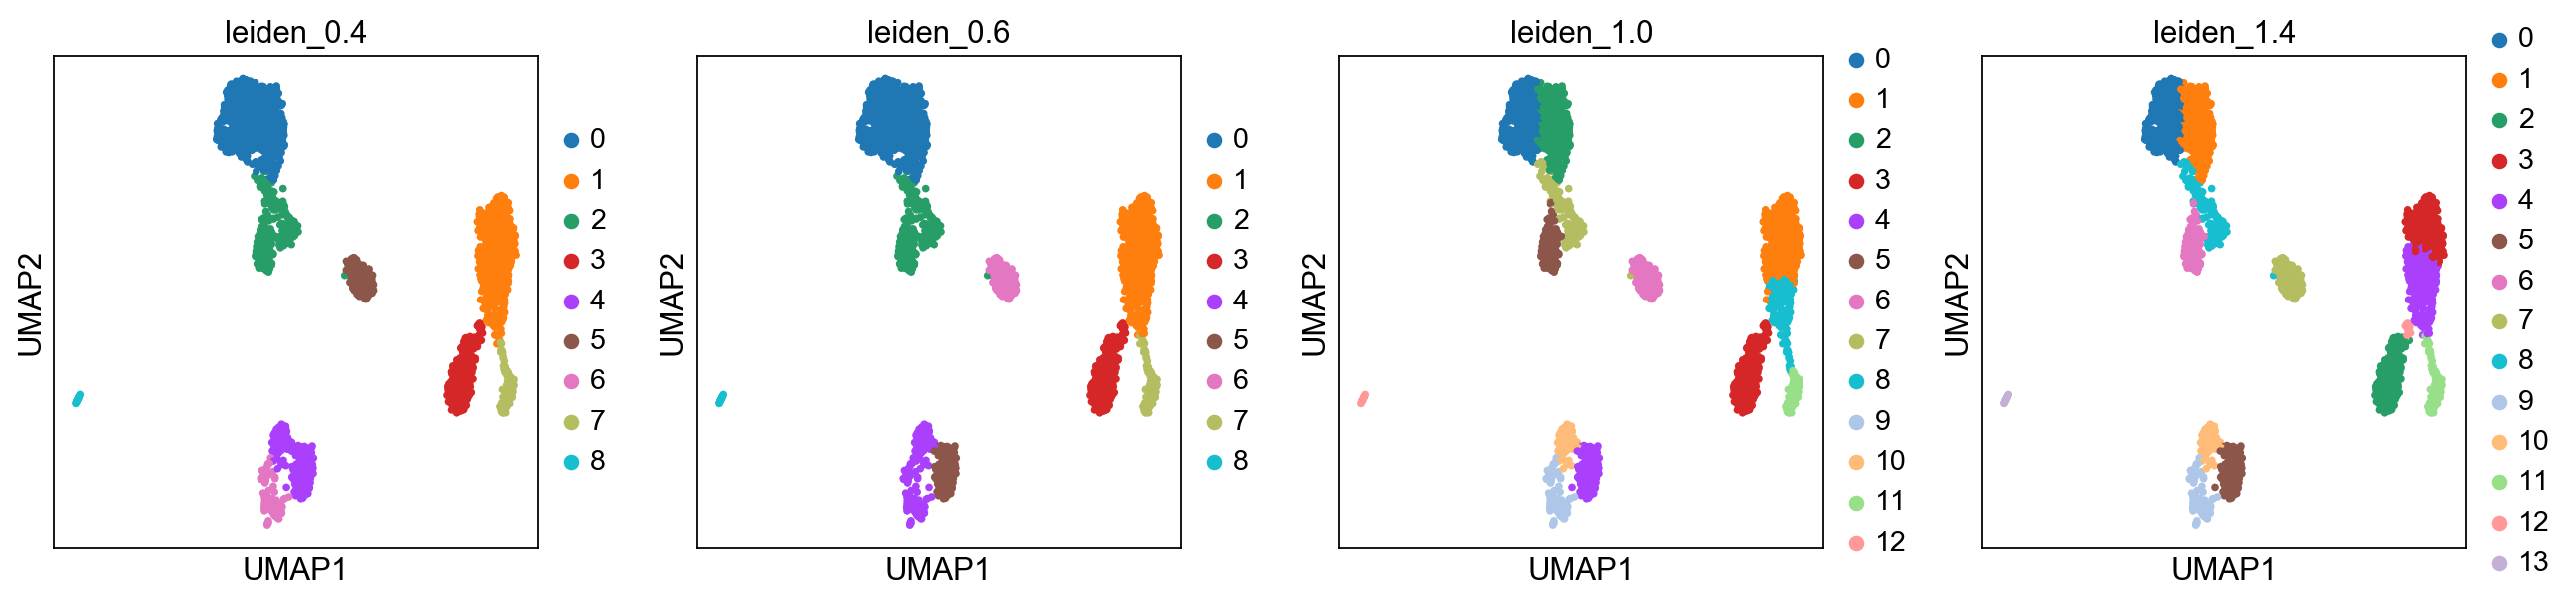

In [6]:
sc.pl.umap(adata, color=['leiden_0.4', 'leiden_0.6', 'leiden_1.0','leiden_1.4'])

#CLUST_5_SCANPY:

    using 'X_pca' with n_pcs = 30
Storing dendrogram info using `.uns['dendrogram_leiden_1.0']`


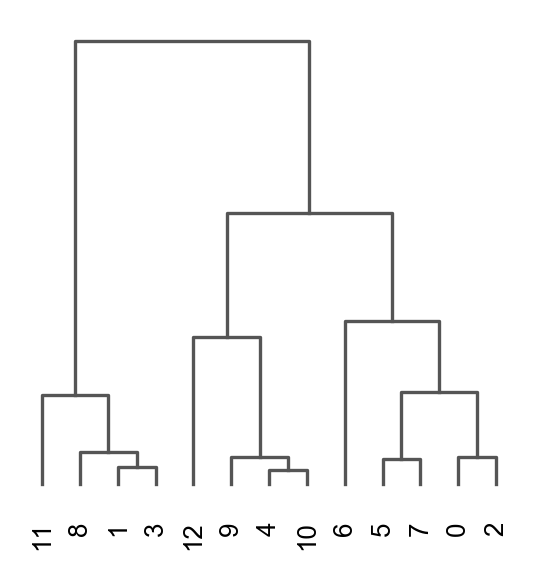

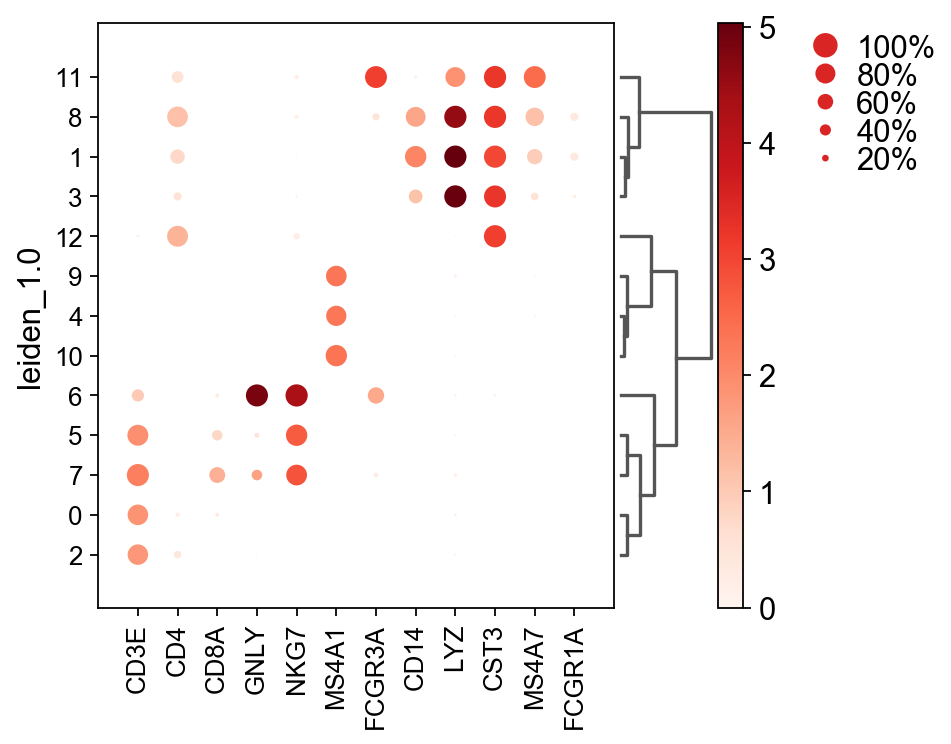

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[4.199999999999999, 0.8, 0.2, 0.5, 0.25])

In [7]:
sc.tl.dendrogram(adata, groupby = "leiden_1.0")
sc.pl.dendrogram(adata, groupby = "leiden_1.0")

genes  = ["CD3E", "CD4", "CD8A", "GNLY","NKG7", "MS4A1","FCGR3A","CD14","LYZ","CST3","MS4A7","FCGR1A"]
sc.pl.dotplot(adata, genes, groupby='leiden_1.0', dendrogram=True)

#CLUST_6_SCANPY:


running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 12 clusters and added
    'louvain_1.0', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 10 clusters and added
    'louvain_0.6', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 7 clusters and added
    'louvain_0.4', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 13 clusters and added
    'louvain_1.4', the cluster labels (adata.obs, categorical) (0:00:00)


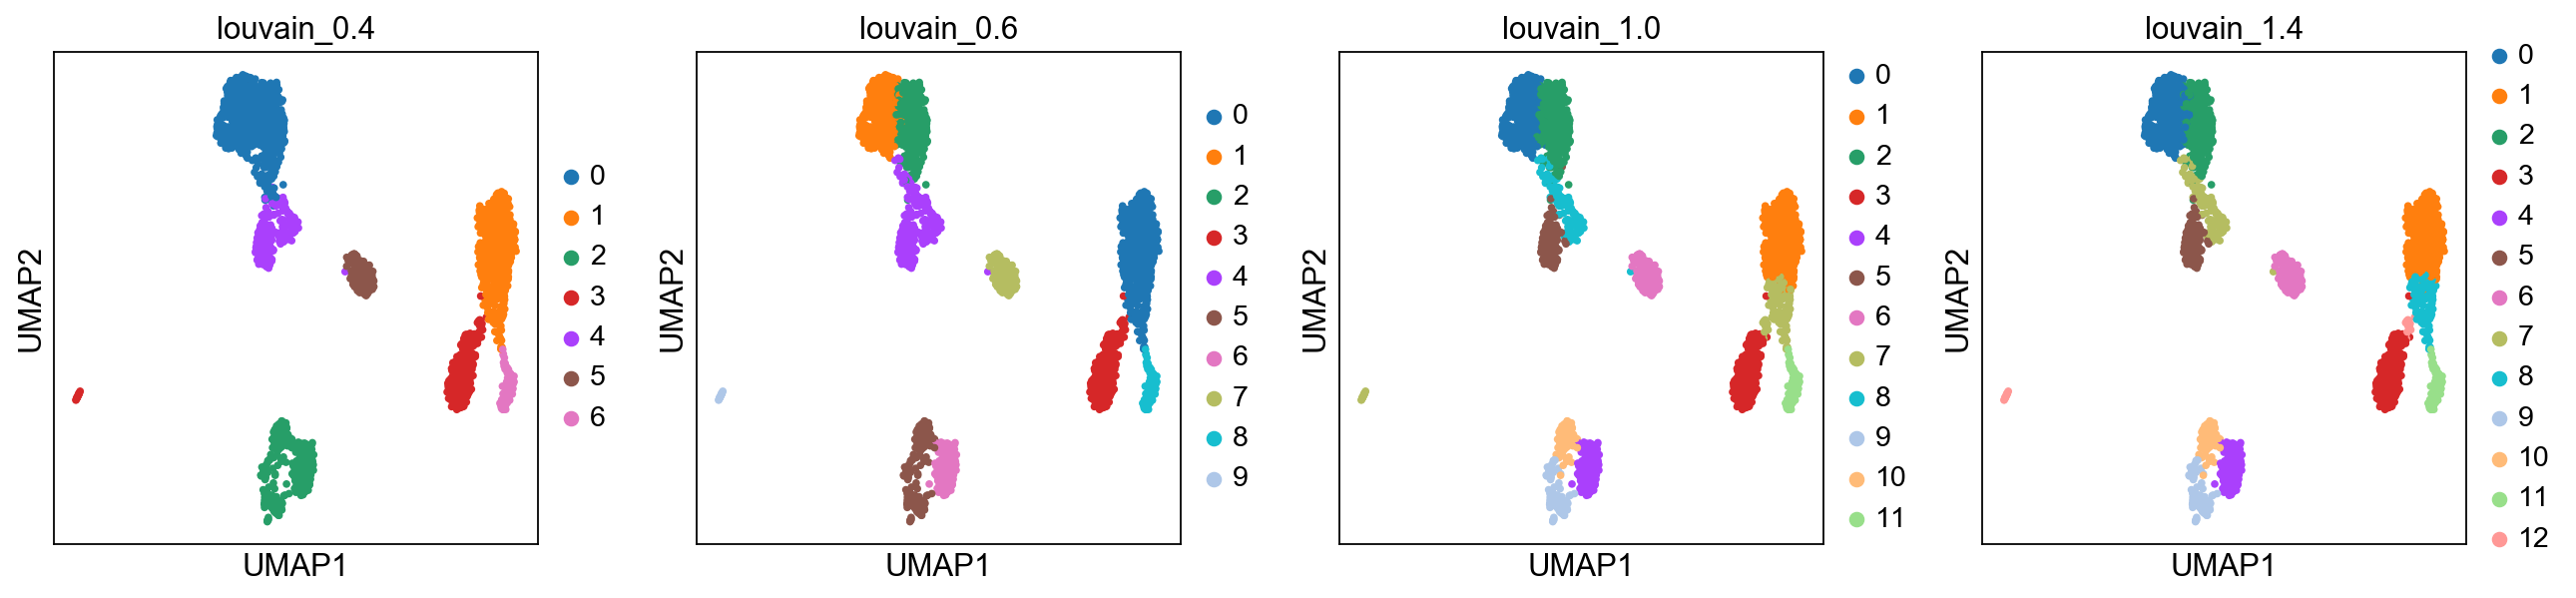

In [8]:
sc.tl.louvain(adata, key_added = "louvain_1.0") # default resolution in 1.0
sc.tl.louvain(adata, resolution = 0.6, key_added = "louvain_0.6")
sc.tl.louvain(adata, resolution = 0.4, key_added = "louvain_0.4")
sc.tl.louvain(adata, resolution = 1.4, key_added = "louvain_1.4")

sc.pl.umap(adata, color=['louvain_0.4', 'louvain_0.6', 'louvain_1.0','louvain_1.4'])

    using 'X_pca' with n_pcs = 30
Storing dendrogram info using `.uns['dendrogram_louvain_1.0']`


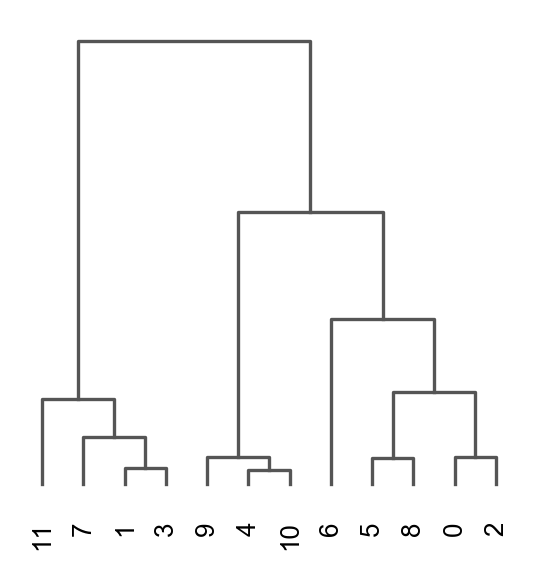

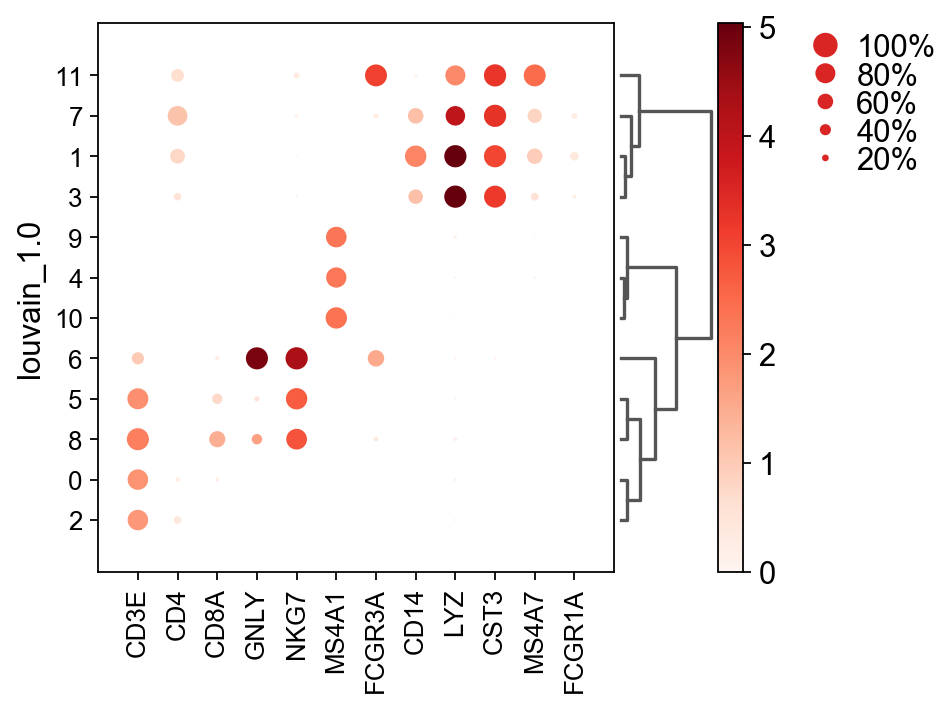

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[4.199999999999999, 0.8, 0.2, 0.5, 0.25])

In [9]:
sc.tl.dendrogram(adata, groupby = "louvain_1.0")
sc.pl.dendrogram(adata, groupby = "louvain_1.0")

genes  = ["CD3E", "CD4", "CD8A", "GNLY","NKG7", "MS4A1","FCGR3A","CD14","LYZ","CST3","MS4A7","FCGR1A"]

sc.pl.dotplot(adata, genes, groupby='louvain_1.0', dendrogram=True)

#CLUST_TITLE3:

#CLUST_ALL7:


... storing 'kmeans5' as categorical
... storing 'kmeans10' as categorical
... storing 'kmeans15' as categorical


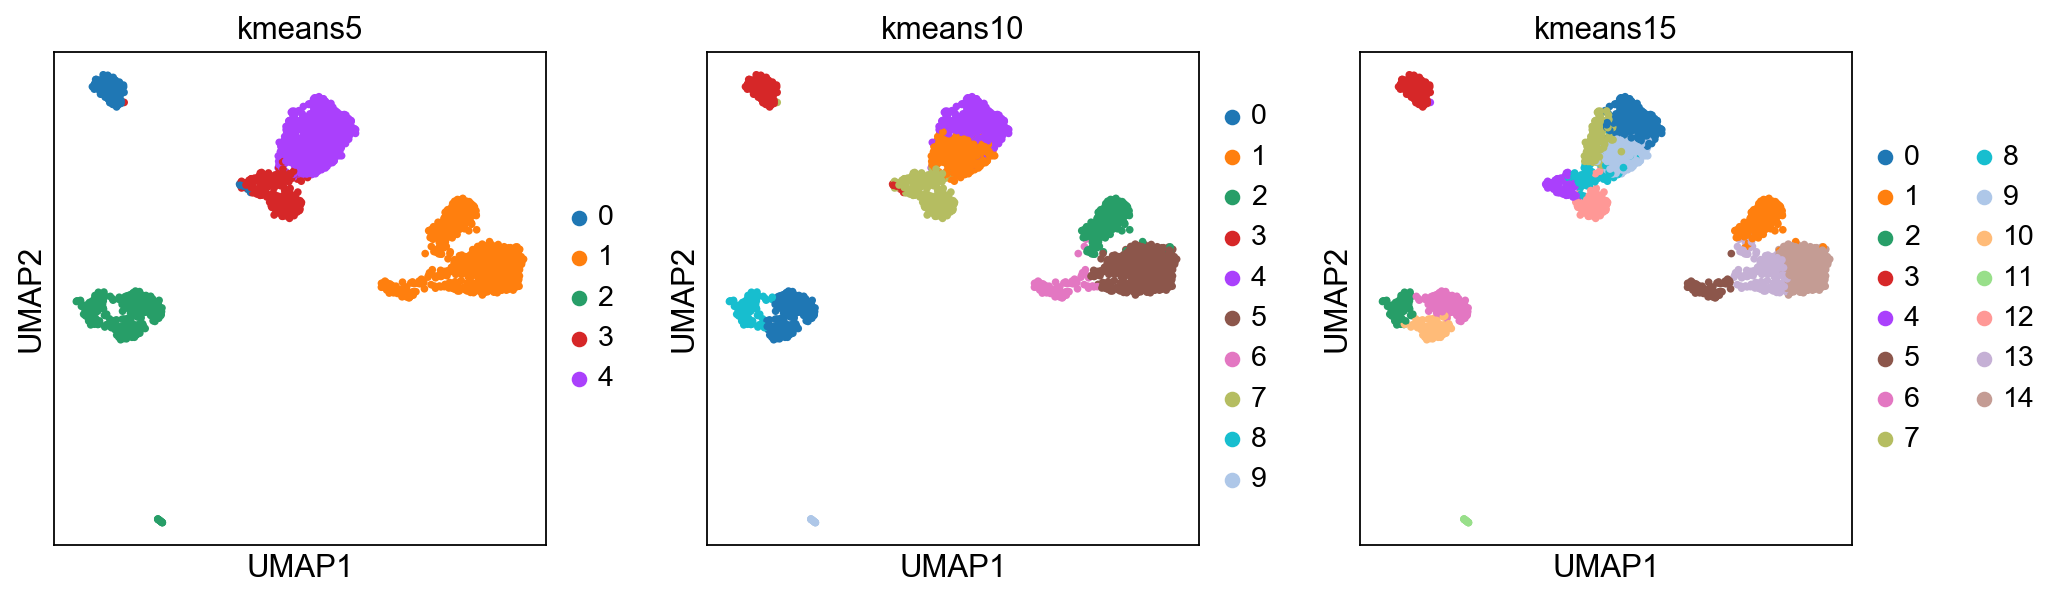

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# extract pca coordinates
X_pca = adata.obsm['X_pca'] 

# kmeans with k=5
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca) 
adata.obs['kmeans5'] = kmeans.labels_.astype(str)

# kmeans with k=10
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_pca) 
adata.obs['kmeans10'] = kmeans.labels_.astype(str)

# kmeans with k=15
kmeans = KMeans(n_clusters=15, random_state=0).fit(X_pca) 
adata.obs['kmeans15'] = kmeans.labels_.astype(str)

sc.pl.umap(adata, color=['kmeans5', 'kmeans10', 'kmeans15'])

#CLUST_TITLE4:

#CLUST_ALL8:

#CLUST_SCANPY8.2:

... storing 'hclust_euclidean_5' as categorical
... storing 'hclust_5' as categorical
... storing 'hclust_10' as categorical
... storing 'hclust_15' as categorical


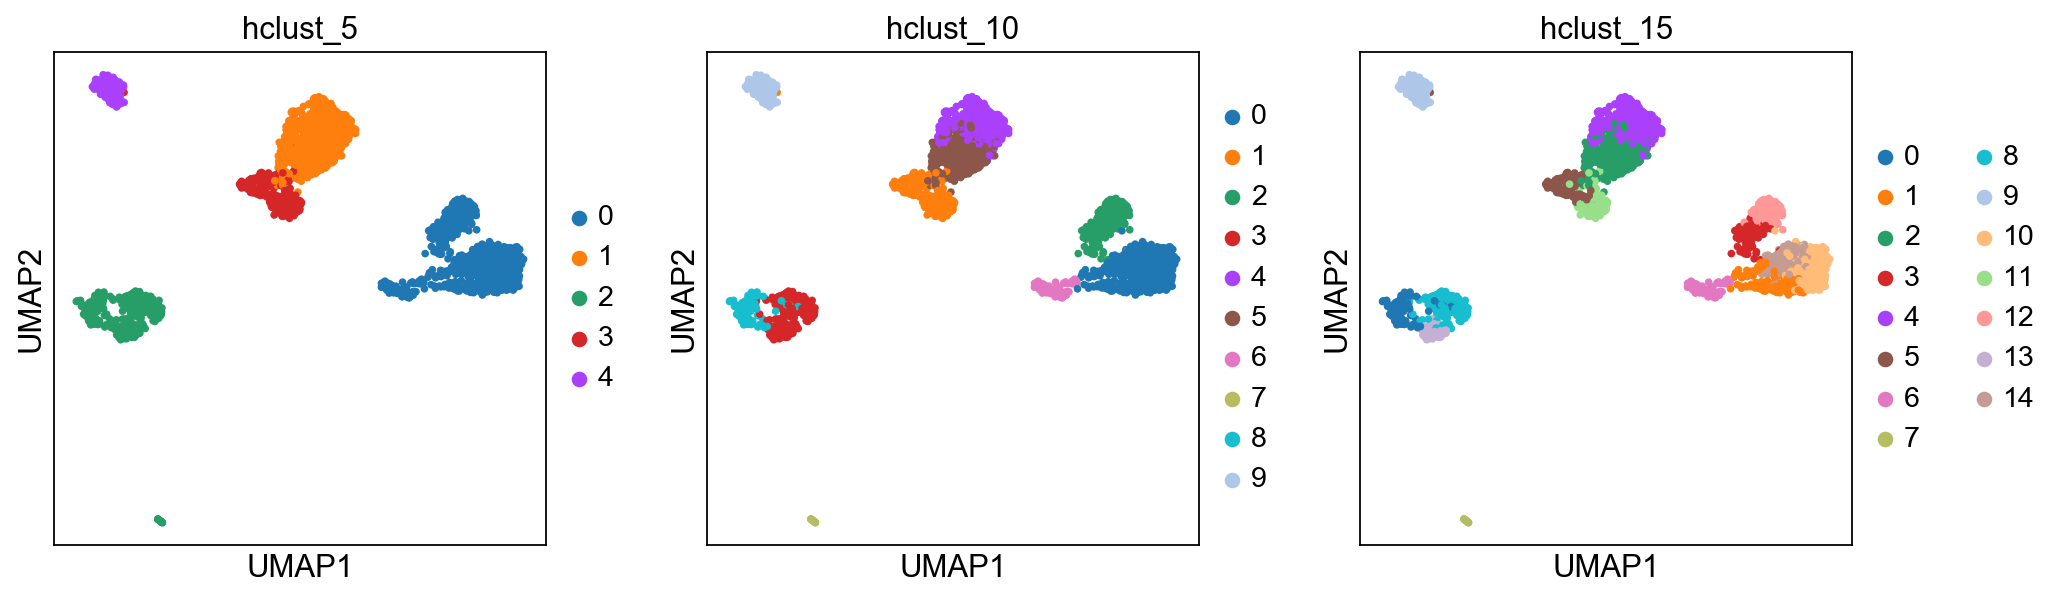

In [23]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
adata.obs['hclust_5'] = cluster.fit_predict(X_pca).astype(str)

cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
adata.obs['hclust_10'] = cluster.fit_predict(X_pca).astype(str)

cluster = AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='ward')
adata.obs['hclust_15'] = cluster.fit_predict(X_pca).astype(str)


sc.pl.umap(adata, color=['hclust_5', 'hclust_10', 'hclust_15'])

#CLUST_ALL9:

In [11]:

adata.write_h5ad('./data/scanpy_clustered_3pbmc.h5ad')